In [6]:
!pip install nbconvert


# Solving Customer Behavior Analysis & AI-driven Insights. I have created a new customer_data.csv dataset with 10,000 rows, each containing a unique Customer_ID.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:

# Define the number of rows
total_rows = 10000
missing_data_rows = 500

# Define the services
services = [
    "Swedish Massage",
    "Remedial Massage",
    "Pregnancy Massage",
    "Sports Massage",
    "Couple Massage",
    "Corporate Massage",
    "Facial",
    "Hair and Make Up",
    "Hair Cut Colouring and Styling"
]


positive_reviews = [
    "Loved the experience!",
    "Highly recommended service.",
    "Great value for money.",
    "Will book again soon!",
    "Absolutely fantastic service.",
    "Excellent and professional staff.",
    "Perfect for relaxation.",
    "Incredible attention to detail.",
    "A truly relaxing session.",
    "Best massage ever!",
    "Exceeded all expectations.",
    "A great treat.",
    "Best service ever.",
    "Happy to visit again."
]


negative_reviews = [
    "Too expensive, not worth.",
    "Not satisfied at all.",
    "Bad customer service.",
    "Would not recommend it.",
    "Very disappointing experience.",
    "Unprofessional staff behavior.",
    "Service below expectations.",
    "Rushed and incomplete.",
    "Waste of time and money.",
    "Did not meet needs.",
    "Terrible communication.",
    "Never go back again.",
    "Poor staff attitude.",
    "Disappointed with quality."
]

np.random.seed(42)
random.seed(42)

# Generate random date between Jan 1, 2022 and Feb 1, 2025
def random_date():
    start_date = datetime(2022, 1, 1)
    end_date = datetime(2025, 2, 1)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + timedelta(days=random_number_of_days)
    return random_date.strftime('%Y-%m-%d')


customer_ids = list(range(1001, 11001))

# Generate other columns
booking_frequency = [random.randint(1, 11) for _ in range(total_rows)]
avg_spending = [random.randint(50, 1200) for _ in range(total_rows)]
preferred_service = [random.choice(services) for _ in range(total_rows)]

# Generate reviews
review_text = []
for _ in range(total_rows):
    if random.random() < 0.05:
        review_text.append(random.choice(negative_reviews))
    else:
        review_text.append(random.choice(positive_reviews))

# Generate last activity dates
last_activity = [random_date() for _ in range(total_rows)]

# Create the DataFrame
df = pd.DataFrame({
    'Customer_ID': customer_ids,
    'Booking_Frequency': booking_frequency,
    'Avg_Spending': avg_spending,
    'Preferred_Service': preferred_service,
    'Review_Text': review_text,
    'Last_Activity': last_activity
})

#missing values
missing_indices = random.sample(range(total_rows), missing_data_rows)

for idx in missing_indices:
    missing_cols = random.sample(['Booking_Frequency', 'Avg_Spending', 'Preferred_Service', 'Review_Text', 'Last_Activity'],
                                random.randint(1, 3))

    for col in missing_cols:
        df.loc[idx, col] = None

# Save to CSV
df.to_csv('customer_data_10000.csv', index=False)

# Print summary information
print(f"Dataset generated with {total_rows} rows")
print(f"Number of rows with missing values: {missing_data_rows}")
print("First 5 rows of the dataset:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDistribution of services:")
print(df['Preferred_Service'].value_counts())
print("\nPercentage of negative reviews:")
neg_reviews = df['Review_Text'].apply(lambda x: x in negative_reviews if pd.notnull(x) else False).sum()
print(f"{neg_reviews / df['Review_Text'].count() * 100:.2f}%")

# Data Preprocessing
##  Handle missing values, normalize numerical features, and extract useful information

In [ ]:
file_path = '/content/customer_data_10000.csv'

In [ ]:
df = pd.read_csv(file_path)
print(f"Total rows: {len(df)}")

Total rows: 10000


# Check for missing values

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values before imputation:")
print(missing_values)


Missing values before imputation:
Customer_ID            0
Booking_Frequency    199
Avg_Spending         196
Preferred_Service    187
Review_Text          198
Last_Activity        222
dtype: int64


# handling missing values in the Booking_Frequency and Avg_Spending columns by replacing them with the median of each column(For numerical columns)

In [ ]:
num_imputer = SimpleImputer(strategy='median')
df[['Booking_Frequency', 'Avg_Spending']] = num_imputer.fit_transform(df[['Booking_Frequency', 'Avg_Spending']])

# missing values in the Preferred_Service column by replacing them with the most frequently occurring value(For categorical columns)

In [ ]:
df[['Preferred_Service']] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Preferred_Service']])


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values before imputation:")
print(missing_values)


Missing values before imputation:
Customer_ID            0
Booking_Frequency      0
Avg_Spending           0
Preferred_Service      0
Review_Text          198
Last_Activity        222
dtype: int64


# For text reviews  

In [ ]:
df['Review_Text'] = df['Review_Text'].fillna("No review provided")

# Convert Last_Activity to datetime

In [ ]:
df['Last_Activity'] = pd.to_datetime(df['Last_Activity'])

In [ ]:
df.head()

,Customer_ID,Booking_Frequency,Avg_Spending,Preferred_Service,Review_Text,Last_Activity
0,1001,11.0,412.0,Remedial Massage,Absolutely fantastic service.,2024-09-23
1,1002,2.0,67.0,Corporate Massage,Loved the experience!,2023-12-16
2,1003,1.0,305.0,Facial,Incredible attention to detail.,2022-03-08
3,1004,5.0,997.0,Swedish Massage,Excellent and professional staff.,2024-07-23
4,1005,4.0,808.0,Hair and Make Up,Best massage ever!,2023-12-05


In [ ]:
current_date = datetime.now()
df['Days_Since_Last_Activity'] = (current_date - df['Last_Activity']).dt.days


In [ ]:
df.head()

,Customer_ID,Booking_Frequency,Avg_Spending,Preferred_Service,Review_Text,Last_Activity,Days_Since_Last_Activity
0,1001,11.0,412.0,Remedial Massage,Absolutely fantastic service.,2024-09-23,180.0
1,1002,2.0,67.0,Corporate Massage,Loved the experience!,2023-12-16,462.0
2,1003,1.0,305.0,Facial,Incredible attention to detail.,2022-03-08,1110.0
3,1004,5.0,997.0,Swedish Massage,Excellent and professional staff.,2024-07-23,242.0
4,1005,4.0,808.0,Hair and Make Up,Best massage ever!,2023-12-05,473.0


# imputer for Days_Since_Last_Activity

In [ ]:
day_imputer = SimpleImputer(strategy='most_frequent')
df['Days_Since_Last_Activity'] = day_imputer.fit_transform(df[['Days_Since_Last_Activity']])

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values before imputation:")
print(missing_values)


Missing values before imputation:
Customer_ID                   0
Booking_Frequency             0
Avg_Spending                  0
Preferred_Service             0
Review_Text                   0
Last_Activity               222
Days_Since_Last_Activity      0
dtype: int64


# calculating the Activity_Score using Min-Max Scaling(give higher scores for recent activity)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Activity_Score'] = scaler.fit_transform(df[['Days_Since_Last_Activity']])
df['Activity_Score'] = 1 - df['Activity_Score']

In [ ]:
df.head()

,Customer_ID,Booking_Frequency,Avg_Spending,Preferred_Service,Review_Text,Last_Activity,Days_Since_Last_Activity,Activity_Score
0,1001,11.0,412.0,Remedial Massage,Absolutely fantastic service.,2024-09-23,180.0,0.884547
1,1002,2.0,67.0,Corporate Massage,Loved the experience!,2023-12-16,462.0,0.634103
2,1003,1.0,305.0,Facial,Incredible attention to detail.,2022-03-08,1110.0,0.058615
3,1004,5.0,997.0,Swedish Massage,Excellent and professional staff.,2024-07-23,242.0,0.829485
4,1005,4.0,808.0,Hair and Make Up,Best massage ever!,2023-12-05,473.0,0.624334


# Sentiment analysis on Review_Text

In [ ]:
senti = SentimentIntensityAnalyzer()

# claculate the compound socre for all the review_text

In [ ]:
# compute sentiment score
def get_sentiment_score(text):
    return senti.polarity_scores(text)['compound']


In [ ]:
df['Sentiment_Score'] = df['Review_Text'].apply(get_sentiment_score)

In [ ]:
def categorize_sentiment(score):
    if score < -0.5:
        return 'Negative'
    elif score <= 0.5:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment_Category'] = df['Sentiment_Score'].apply(categorize_sentiment)

In [ ]:
df.head()

,Customer_ID,Booking_Frequency,Avg_Spending,Preferred_Service,Review_Text,Last_Activity,Days_Since_Last_Activity,Activity_Score,Sentiment_Score,Sentiment_Category
0,1001,11.0,412.0,Remedial Massage,Absolutely fantastic service.,2024-09-23,180.0,0.884547,0.5984,Positive
1,1002,2.0,67.0,Corporate Massage,Loved the experience!,2023-12-16,462.0,0.634103,0.6360,Positive
2,1003,1.0,305.0,Facial,Incredible attention to detail.,2022-03-08,1110.0,0.058615,0.0000,Neutral
3,1004,5.0,997.0,Swedish Massage,Excellent and professional staff.,2024-07-23,242.0,0.829485,0.5719,Positive
4,1005,4.0,808.0,Hair and Make Up,Best massage ever!,2023-12-05,473.0,0.624334,0.6696,Positive


# Normalizeing numerical features for clustering

In [ ]:
scaler = StandardScaler()
df_scaled = df.copy()
numerical_cols = ['Booking_Frequency', 'Avg_Spending', 'Activity_Score', 'Sentiment_Score']
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData preprocessing complete.")
print(f"Rows after preprocessing: {len(df)}")
print("\nSample of preprocessed data:")
print(df.head())




Data preprocessing complete.
Rows after preprocessing: 10000

Sample of preprocessed data:
   Customer_ID  Booking_Frequency  Avg_Spending  Preferred_Service  \
0         1001               11.0         412.0   Remedial Massage   
1         1002                2.0          67.0  Corporate Massage   
2         1003                1.0         305.0             Facial   
3         1004                5.0         997.0    Swedish Massage   
4         1005                4.0         808.0   Hair and Make Up   

                         Review_Text Last_Activity  Days_Since_Last_Activity  \
0      Absolutely fantastic service.    2024-09-23                     180.0   
1              Loved the experience!    2023-12-16                     462.0   
2    Incredible attention to detail.    2022-03-08                    1110.0   
3  Excellent and professional staff.    2024-07-23                     242.0   
4                 Best massage ever!    2023-12-05                     473.0   

   Act

In [ ]:
print(df_scaled)

      Customer_ID  Booking_Frequency  Avg_Spending  \
0            1001           1.565915     -0.637703   
1            1002          -1.297167     -1.690865   
2            1003          -1.615287     -0.964336   
3            1004          -0.342806      1.148095   
4            1005          -0.660927      0.571145   
...           ...                ...           ...   
9995        10996          -0.024686     -0.311070   
9996        10997           0.293434     -1.007073   
9997        10998           1.247795     -0.127911   
9998        10999          -0.024686     -1.190231   
9999        11000           0.293434      0.903883   

                   Preferred_Service                        Review_Text  \
0                   Remedial Massage      Absolutely fantastic service.   
1                  Corporate Massage              Loved the experience!   
2                             Facial    Incredible attention to detail.   
3                    Swedish Massage  Excellent and

In [ ]:
df_scaled_copy = df_scaled[numerical_cols].copy()

# Using Elbow method to determine the optimal number of clusters.

In [ ]:
clusters_num = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled_copy)
    clusters_num.append(kmeans.inertia_)

# plotting the elbow method

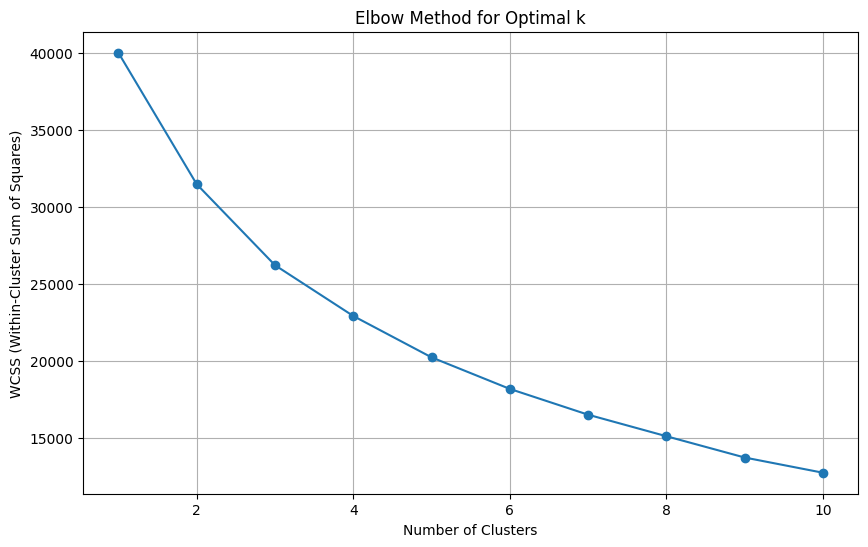

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), clusters_num, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Applying K-Means

In [ ]:
k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_scaled_copy['Cluster'] = kmeans.fit_predict(df_scaled_copy)


print("Customer Cluster Distribution:")
print(df_scaled['Cluster'].value_counts())

Customer Cluster Distribution:
Cluster
3    2698
2    2696
0    2338
1    2268
Name: count, dtype: int64


In [ ]:
cluster_stats = df.groupby(df_scaled_copy['Cluster']).agg({
    'Booking_Frequency': 'mean',
    'Avg_Spending': 'mean',
    'Days_Since_Last_Activity': 'mean',
    'Sentiment_Score': 'mean',
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'Count'})
print("\nCluster Centers (Original Scale):")
print(cluster_stats)


Cluster Centers (Original Scale):
         Booking_Frequency  Avg_Spending  Days_Since_Last_Activity  \
Cluster                                                              
0                 3.065441    425.002139                554.734388   
1                 8.966049    379.595679                620.907407   
2                 6.036721    649.562685                628.196958   
3                 6.300593    964.869533                648.684581   

         Sentiment_Score  Count  
Cluster                          
0               0.624050   2338  
1               0.620429   2268  
2              -0.071090   2696  
3               0.641126   2698  


# Cluster analysis

In [ ]:
cluster_stats['Percentage'] = cluster_stats['Count'] / cluster_stats['Count'].sum() * 100

Text(0, 0.5, 'Standardized Booking Frequency')

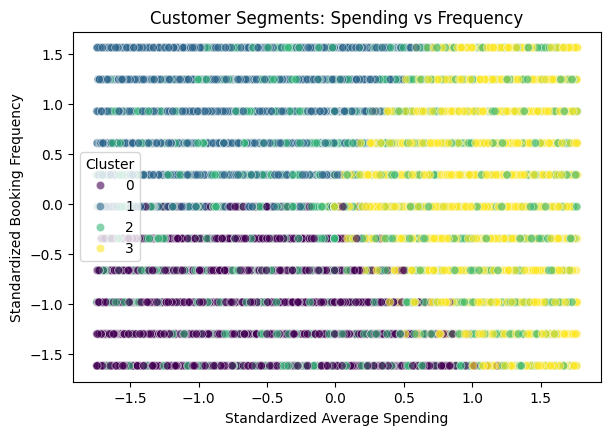

In [ ]:
plt.figure(figsize=(15, 10))

# Plot 1: Spending vs Frequency
plt.subplot(2, 2, 1)
sns.scatterplot(
    data=df_scaled,
    x='Avg_Spending',
    y='Booking_Frequency',
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
plt.title('Customer Segments: Spending vs Frequency')
plt.xlabel('Standardized Average Spending')
plt.ylabel('Standardized Booking Frequency')

Text(0, 0.5, 'Standardized Activity Score')

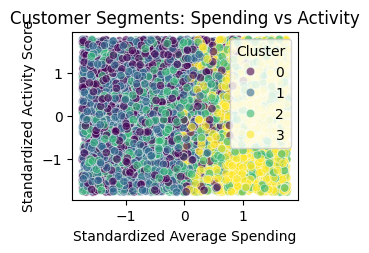

In [ ]:
# Plot 2: Spending vs Recency
plt.subplot(2, 2, 2)
sns.scatterplot(
    data=df_scaled,
    x='Avg_Spending',
    y='Activity_Score',
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
plt.title('Customer Segments: Spending vs Activity')
plt.xlabel('Standardized Average Spending')
plt.ylabel('Standardized Activity Score')

Text(0, 0.5, 'Standardized Sentiment Score')

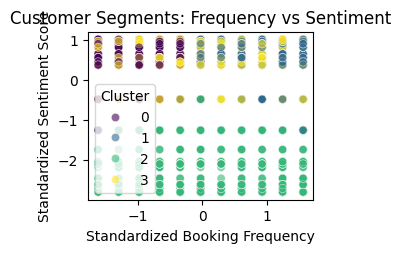

In [ ]:
# Plot 3: Frequency vs Sentiment
plt.subplot(2, 2, 3)
sns.scatterplot(
    data=df_scaled_copy,
    x='Booking_Frequency',
    y='Sentiment_Score',
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
plt.title('Customer Segments: Frequency vs Sentiment')
plt.xlabel('Standardized Booking Frequency')
plt.ylabel('Standardized Sentiment Score')

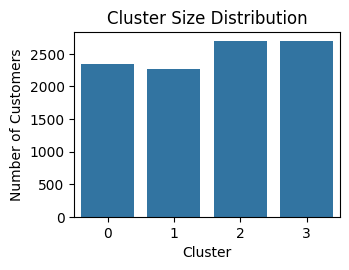

In [ ]:
# Plot 4: Cluster size distribution
plt.subplot(2, 2, 4)
cluster_counts = df_scaled_copy['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [ ]:
# Ranking clusters by different metrics
spending_rank = cluster_stats.sort_values('Avg_Spending', ascending=False).index
frequency_rank = cluster_stats.sort_values('Booking_Frequency', ascending=False).index
recency_rank = cluster_stats.sort_values('Days_Since_Last_Activity').index  # Lower is more recent
sentiment_rank = cluster_stats.sort_values('Sentiment_Score', ascending=False).index


In [ ]:
cluster_profiles = pd.DataFrame({
    'Size': cluster_stats['Count'],
    'Percentage': cluster_stats['Percentage'].round(1),
    'Avg_Spending': cluster_stats['Avg_Spending'].round(2),
    'Booking_Frequency': cluster_stats['Booking_Frequency'].round(2),
    'Days_Since_Last_Activity': cluster_stats['Days_Since_Last_Activity'].round(0),
    'Sentiment_Score': cluster_stats['Sentiment_Score'].round(2),
    'Spending_Rank': [list(spending_rank).index(i) + 1 for i in range(k)],
    'Frequency_Rank': [list(frequency_rank).index(i) + 1 for i in range(k)],
    'Recency_Rank': [list(recency_rank).index(i) + 1 for i in range(k)],
    'Sentiment_Rank': [list(sentiment_rank).index(i) + 1 for i in range(k)]
})

In [ ]:
cluster_labels = {
    0: "Regular Value Customers",
    1: "Frequent Budget Customers",
    2: "Premium Occasional Customers",
    3: "High-Value Customers"
}

In [ ]:

print("\nDetailed Cluster Profiles:")
print(cluster_profiles)
print("\nCluster Interpretations:")
for cluster, label in cluster_labels.items():
    print(f"Cluster {cluster}: {label}")



Detailed Cluster Profiles:
         Size  Percentage  Avg_Spending  Booking_Frequency  \
Cluster                                                      
0        2338        23.4        425.00               3.07   
1        2268        22.7        379.60               8.97   
2        2696        27.0        649.56               6.04   
3        2698        27.0        964.87               6.30   

         Days_Since_Last_Activity  Sentiment_Score  Spending_Rank  \
Cluster                                                             
0                           555.0             0.62              3   
1                           621.0             0.62              4   
2                           628.0            -0.07              2   
3                           649.0             0.64              1   

         Frequency_Rank  Recency_Rank  Sentiment_Rank  
Cluster                                                
0                     4             1               2  
1               


High-Value Customer Analysis:
Number of high-value customers: 1002 (10.0%)
Average spending: $1138.67
Average booking frequency: 6.15

High-value customers by cluster:
Cluster
3    73.053892
2    26.946108
Name: proportion, dtype: float64

Service preferences of high-value customers:
Preferred_Service
Facial                            13.972056
Pregnancy Massage                 13.473054
Hair and Make Up                  11.477046
Hair Cut Colouring and Styling    11.377246
Couple Massage                    10.778443
Remedial Massage                  10.479042
Swedish Massage                    9.980040
Sports Massage                     9.580838
Corporate Massage                  8.882236
Name: proportion, dtype: float64


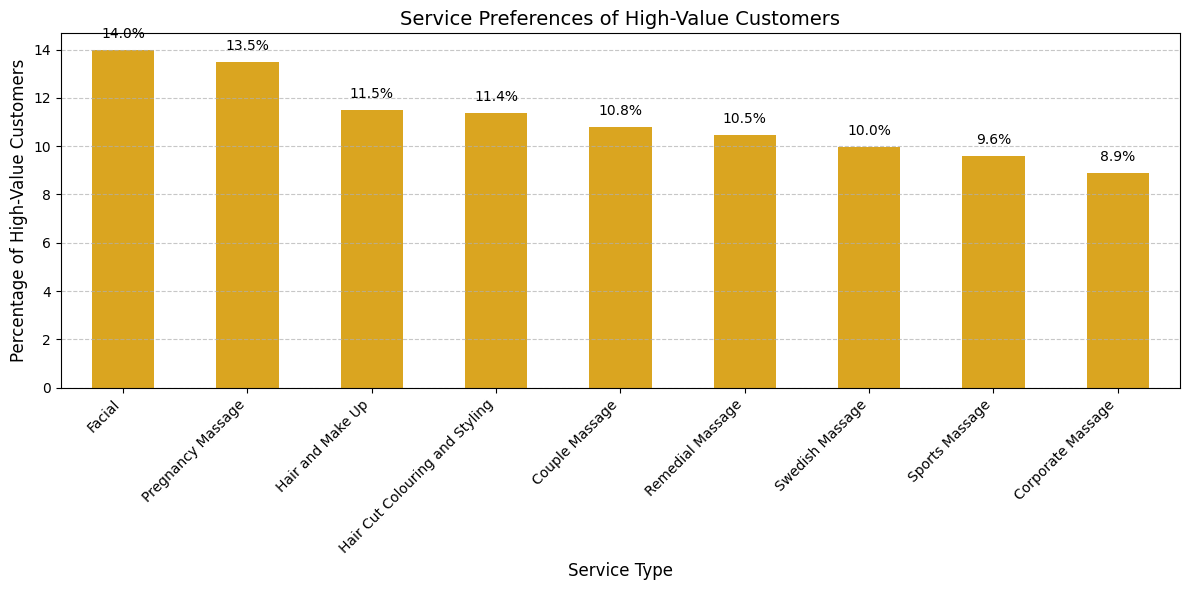

In [ ]:
# Define high-value customers
high_value_threshold = np.percentile(df['Avg_Spending'], 90)
high_value_customers = df[df['Avg_Spending'] >= high_value_threshold].copy()

# Add cluster information
high_value_customers['Cluster'] = df_scaled_copy.loc[high_value_customers.index, 'Cluster']

# High-value customer stats
print(f"\nHigh-Value Customer Analysis:")
print(f"Number of high-value customers: {len(high_value_customers)} ({len(high_value_customers)/len(df)*100:.1f}%)")
print(f"Average spending: ${high_value_customers['Avg_Spending'].mean():.2f}")
print(f"Average booking frequency: {high_value_customers['Booking_Frequency'].mean():.2f}")

# Distribution of high-value customers across clusters
high_value_cluster_dist = high_value_customers['Cluster'].value_counts(normalize=True) * 100
print("\nHigh-value customers by cluster:")
print(high_value_cluster_dist)

# Service preferences of high-value customers
high_value_services = high_value_customers['Preferred_Service'].value_counts(normalize=True) * 100
print("\nService preferences of high-value customers:")
print(high_value_services)

# Create a visualization of service preferences for high-value customers
plt.figure(figsize=(12, 6))
ax = high_value_services.plot(kind='bar', color='goldenrod')
plt.title('Service Preferences of High-Value Customers', fontsize=14)
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Percentage of High-Value Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for i, v in enumerate(high_value_services):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Churn Risk Analysis:
Number of at-risk customers: 1878 (18.8%)
Average days since last activity: 681
Average sentiment score: 0.28

At-risk customers by cluster:
Cluster
0    44.408946
2    39.190628
3    16.400426
Name: proportion, dtype: float64


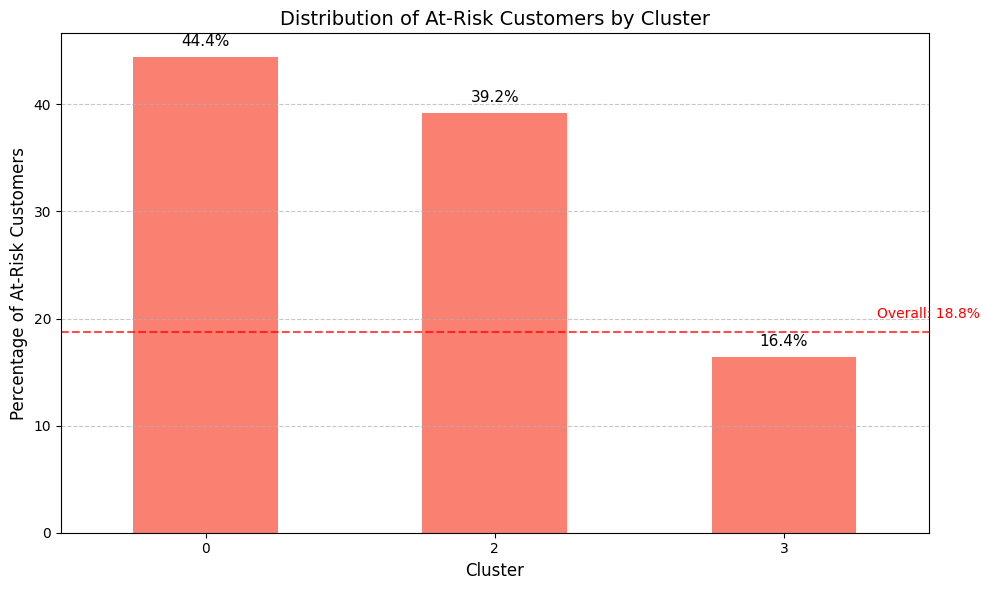

In [ ]:
# Define churn risk criteria
# 1. Not active in last 6 months
# 2. Low booking frequency (< 3)
# 3. Negative sentiment
recent_cutoff = datetime.now() - relativedelta(months=6)
low_frequency_cutoff = 3
negative_sentiment_cutoff = 0 

# Identify at-risk customers
churn_risk = df[
    (df['Last_Activity'] < recent_cutoff) &
    ((df['Booking_Frequency'] < low_frequency_cutoff) |
    (df['Sentiment_Score'] < negative_sentiment_cutoff))
].copy()


churn_risk['Cluster'] = df_scaled_copy.loc[churn_risk.index, 'Cluster']

# At-risk customer stats
print(f"\nChurn Risk Analysis:")
print(f"Number of at-risk customers: {len(churn_risk)} ({len(churn_risk)/len(df)*100:.1f}%)")
print(f"Average days since last activity: {churn_risk['Days_Since_Last_Activity'].mean():.0f}")
print(f"Average sentiment score: {churn_risk['Sentiment_Score'].mean():.2f}")

# Distribution of at-risk customers across clusters
churn_cluster_dist = churn_risk['Cluster'].value_counts(normalize=True) * 100
print("\nAt-risk customers by cluster:")
print(churn_cluster_dist)

# Create a visualization of at-risk customers by cluster
plt.figure(figsize=(10, 6))
ax = churn_cluster_dist.plot(kind='bar', color='salmon')
plt.title('Distribution of At-Risk Customers by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage of At-Risk Customers', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(churn_cluster_dist):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=11)

# Add a horizontal line for the average percentage of at-risk customers
avg_pct = len(churn_risk)/len(df)*100
plt.axhline(y=avg_pct, color='red', linestyle='--', alpha=0.7)
plt.text(len(churn_cluster_dist)-0.5, avg_pct+1, f"Overall: {avg_pct:.1f}%",
         color='red', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Customer Behavior Analysis & AI-Driven Insights Report

## 1. High-Value Customer Analysis  
Our analysis identified **1,002 high-value customers**, representing **10.0%** of the total customer base. These customers exhibit:  
- **Average spending:** $1,138.67  
- **Average booking frequency:** 6.15  

### Cluster Distribution:  
- **Cluster 3:** 73.05%  
- **Cluster 2:** 26.95%  

### Service Preferences:  
High-value customers predominantly prefer the following services:  
1. **Facial** – 13.97%  
2. **Pregnancy Massage** – 13.47%  
3. **Hair and Make-Up** – 11.48%  
4. **Hair Cut, Coloring, and Styling** – 11.38%  
5. **Couple Massage** – 10.78%  

## 2. Churn Risk Analysis  
A total of **1,878 customers (18.8%)** are at risk of churn, based on the following indicators:  
- **Average days since last activity:** 681  
- **Average sentiment score:** 0.28  

### At-Risk Customer Cluster Distribution:  
- **Cluster 0:** 44.41%  
- **Cluster 2:** 39.19%  
- **Cluster 3:** 16.40%  

## 3. Recommendations  

 **Retention Strategies for High-Value Customers:**  
- Offer personalized loyalty programs and exclusive deals.  
- Prioritize preferred services in promotional campaigns.  
- Implement a VIP membership for high-frequency customers.  

 **Engagement Tactics for At-Risk Customers:**  
- Initiate re-engagement campaigns via email and SMS.  
- Offer personalized discounts or service reminders.  
- Analyze sentiment trends to improve customer experience.  

By leveraging these insights, businesses can enhance customer retention and maximize long-term value.


In [8]:
!jupyter nbconvert --to html "/content/Customer_Behavior_Analysis_&_AI_driven_Insights (1).ipynb"


[NbConvertApp] Converting notebook /content/Customer_Behavior_Analysis_&_AI_driven_Insights (1).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 1062570 bytes to /content/Customer_Behavior_Analysis_&_AI_driven_Insights (1).html
